In [1]:
import pytorch_lightning as pl
from models import *
from data.data_classes import *

In [2]:
save_filepath = "./plots/live_plot4.pdf"

In [3]:
batch_size = 8

data_path = "data/harness/combined.npy"
num_ctx_frames = 1
num_tgt_frames = 9
split_ratio=[0, 1.0, 0.0]

liveness_datamodule = LivenessDataModule(batch_size, 
                                         num_ctx_frames, num_tgt_frames,
                                         data_path,
                                         split_ratio=split_ratio)

liveness_datamodule.setup()

val_dl = liveness_datamodule.val_dataloader()
val_ctx_frames, val_tgt_frames = next(iter(val_dl))                                            

### 3DConvNet

In [4]:
# # Experiment 1 (iltered and non-augmented)
# model = ThreeDConv_1to9()
# model = model.load_from_checkpoint("./logs/ThreeDConv_1to9/experiment1/checkpoints/epoch=99-step=300.ckpt")

# # Experiment 2 (iltered and augmented)
# model = ThreeDConv_1to9()
# model = model.load_from_checkpoint("./logs/ThreeDConv_1to9/experiment2/checkpoints/epoch=99-step=300.ckpt")

### SimVP

In [5]:
# # Experiment 4
# hid_s=64
# hid_t=256
# N_s=4
# N_t=8
# kernel_sizes=[3,5,7,11]
# groups=4

# channels = 3
# height = 280
# width = 160
# input_shape = (channels, num_ctx_frames, height, width)

# model = SimVP_1to9(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment4/checkpoints/epoch=99-step=1000.ckpt")

# # Experiment 6
# model = SimVP_1to9(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment6/checkpoints/epoch=99-step=4000.ckpt")

# # Experiment 8
# model = SimVP_1to9(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment8/checkpoints/epoch=99-step=4000.ckpt")



### PredRNN

In [6]:
# # Experiment 4 (filtered; mse)
# input_channels=3
# num_hidden=[64, 64, 64]
# kernel_size=5
# stride=1
# learning_rate=1e-3

# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN/experiment4/checkpoints/epoch=99-step=1000.ckpt")

# # Experiment 5 (filtered; mse)
# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN/experiment5/checkpoints/epoch=99-step=1000.ckpt")

# # Experiment 6 (filtered and augmented; mse)
# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN/experiment6/checkpoints/epoch=99-step=4000.ckpt")  

# # Experiment 7 (filtered and augmented; l1)
# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN/experiment7/checkpoints/epoch=99-step=4000.ckpt")  

### Predicted frames set 1

In [7]:
# # Experiment 1 (iltered and non-augmented)
# model = ThreeDConv_1to9()
# model = model.load_from_checkpoint("./logs/ThreeDConv_1to9/experiment1/checkpoints/epoch=99-step=300.ckpt")

In [8]:
# model.eval()
# model1_pred_frames = torch.zeros_like(val_tgt_frames)

# for i in range(9):
#     if i == 0:
#         model1_pred_frames[:, :, i] = model(val_ctx_frames).squeeze()
#     else:
#         model1_pred_frames[:, :, i] = model(model1_pred_frames[:, :, i-1:i]).squeeze()

# torch.save(model1_pred_frames, "./plots/1-9-3dconv-ft.pt")
# model1_pred_frames.shape

In [9]:
model1_pred_frames = torch.load("./plots/1-9-3dconv-ft.pt")

### Predicted Frames Set 2

In [10]:
# # Experiment 4 (filtered; mse)
# hid_s=64
# hid_t=256
# N_s=4
# N_t=8
# kernel_sizes=[3,5,7,11]
# groups=4

# channels = 3
# height = 280
# width = 160
# input_shape = (channels, num_ctx_frames, height, width)

# model = SimVP_1to9(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment4/checkpoints/epoch=99-step=1000.ckpt")

In [11]:
# model.eval()
# model2_pred_frames = torch.zeros_like(val_tgt_frames)

# for i in range(9):
#     if i == 0:
#         model2_pred_frames[:, :, i] = model(val_ctx_frames).squeeze()
#     else:
#         model2_pred_frames[:, :, i] = model(model2_pred_frames[:, :, i-1:i]).squeeze()

# torch.save(model2_pred_frames, "./plots/1-9-simvp-ft.pt")
# model2_pred_frames.shape

In [12]:
model2_pred_frames = torch.load("./plots/1-9-simvp-ft.pt")

### Predicted Frames Set 3

In [13]:
# # Experiment 4 (filtered; mse)
# input_channels=3
# num_hidden=[64, 64, 64]
# kernel_size=5
# stride=1
# learning_rate=1e-3

# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN/experiment4/checkpoints/epoch=99-step=1000.ckpt")

In [14]:
# height = 280
# width = 160

# model3_pred_frames = torch.zeros(batch_size, 3, 10, height, width)
# model3_pred_frames[:, :, 0:1] = val_ctx_frames

# model.eval()
# for i in range(1, 10):
#     input = model3_pred_frames[:, :, i-1:i].repeat(1, 1, 2, 1, 1)
#     model3_pred_frames[:, :, i:i+1] = model(input)

# torch.save(model3_pred_frames, "./plots/1-9-pred-ft.pt")
# model3_pred_frames.shape

In [15]:
model3_pred_frames = torch.load("./plots/1-9-pred-ft.pt")

### Plotting

In [16]:
def make_ten_frame_thesis_plot(ctx_frame, frame_sets, names, plot_width, plot_height):
    num_ctx_frames= 1
    num_tgt_frames = 9

    def show_frames(frames, ax, row_label):
        ax[0].imshow(ctx_frame)
        ax[0].set_ylabel(row_label)
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_xlabel("t=1")
        ax[0].xaxis.set_label_coords(.52, 1.15)

        for i, frame in enumerate(frames):
            ax[i+num_ctx_frames].imshow(frame)
            ax[i+num_ctx_frames].set_xticks([])
            ax[i+num_ctx_frames].set_yticks([])
            ax[i+num_ctx_frames].set_xlabel(f"t={2+i}")
            ax[i+num_ctx_frames].xaxis.set_label_coords(.52, 1.15)


    fig, ax = plt.subplots(len(frame_sets), 10,
                               figsize = (plot_width, plot_height))

    for i, frames in enumerate(frame_sets):
        frames = frames.squeeze().permute(1, 2, 3, 0).cpu().detach().numpy()
        show_frames(frames, ax[i], names[i])

    fig.set_facecolor("white")
    plt.savefig(save_filepath)
    return fig

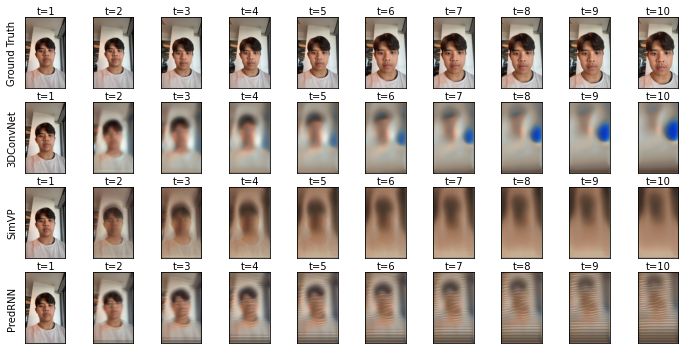

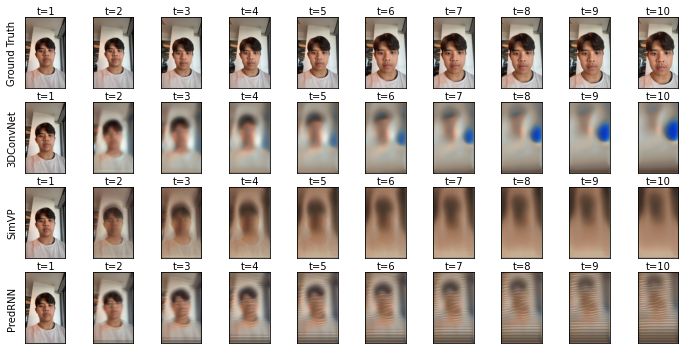

In [17]:
index = 4
plot_width = 12
plot_height = 6

ctx_frame = val_ctx_frames[index].squeeze().permute(1, 2, 0).detach().numpy()
frame_sets = [val_tgt_frames[index],
              model1_pred_frames[index],
              model2_pred_frames[index],
              model3_pred_frames[index, :, 1:]]

names = ["Ground Truth", "3DConvNet", "SimVP", "PredRNN"]               
make_ten_frame_thesis_plot(ctx_frame, frame_sets, 
                           names, plot_width, plot_height)